In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber: int
    finalNumber2: int

In [10]:
def add_node(state: AgentState) -> AgentState:
    """Addtion Node 1"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def sub_node(state: AgentState) -> AgentState:
    """Sub Node 1"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def add_node2(state: AgentState) -> AgentState:
    """Addtion Node 2"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def sub_node2(state: AgentState) -> AgentState:
    """subtraction Node 2"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state


def decider(state: AgentState) ->AgentState:
    """Router 1"""
    if state['operation'] == '+':
        return 'addtion_operation'
    elif state['operation'] == '-':
        return 'subtraction_operation'
    
def decider2(state: AgentState) ->AgentState:
    """Router 2"""
    if state['operation2'] == '+':
        return 'addtion_operation2'
    elif state['operation2'] == '-':
        return 'subtraction_operation2'

In [11]:
graph = StateGraph(AgentState)

graph.add_node('add_node', add_node)
graph.add_node('sub_node', sub_node)
graph.add_node('add_node2', add_node2)
graph.add_node('sub_node2', sub_node2)
graph.add_node('router', lambda state: state)
graph.add_node('router2', lambda state: state)


graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router', decider,
    {
        'addition_operation': 'add_node',
        'subtraction_operation': 'sub_node'
    }
)
graph.add_edge('add_node', 'router2')
graph.add_edge('sub_node', 'router2')

graph.add_conditional_edges(
    'router2', decider2,
    {
        'addtion_operation2': 'add_node2',
        'subtraction_operatio2': 'sub_node2'

    }
)

graph.add_edge('add_node2', END)
graph.add_edge('sub_node2', END)


app = graph.compile()

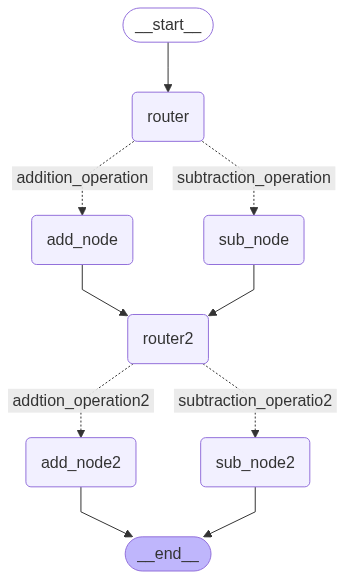

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
fin = app.invoke(
    {
        'number1': 10,
        'number2': 5,
        'number3': 7,
        'number4': 2,
        'operation': '-',
        'operation2': '+',
        'finalNumber': 0,
        'finalNumber2': 0 
        })

fin['finalNumber']['finalNumber2']

TypeError: 'int' object is not subscriptable